In [1]:
import random
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import scipy
# from fitter import Fitter, get_common_distributions, get_distributions
from math import pi, exp

In [2]:
db = pd.read_csv(r'../dane/moves300600_noindex.csv')

In [3]:
db['game_ID'].max()

275994

In [4]:
db.loc[510:520,[column for column in db.columns if column not in ["WhiteRatingDiff",'Unnamed: 0']]]

,game_ID,score,delta_time,WhiteElo,BlackElo,TimeControl,color,move,Result
510,9,0,0,1192,1204,300+0,w,23,0-1
511,9,0,9,1192,1204,300+0,b,23,0-1
512,9,0,2,1192,1204,300+0,w,24,0-1
513,9,0,18,1192,1204,300+0,b,24,0-1
514,9,0,7,1192,1204,300+0,w,25,0-1
515,9,0,10,1192,1204,300+0,b,25,0-1
516,9,blunder,8,1192,1204,300+0,w,26,0-1
517,9,blunder,8,1192,1204,300+0,b,26,0-1
518,9,mistake,4,1192,1204,300+0,w,27,0-1
519,9,0,2,1192,1204,300+0,b,27,0-1


In [5]:
a = db.groupby('TimeControl').agg({'score': 'count'})
a['percent'] = a['score']/sum(a['score'])
a.sort_values('percent',ascending=False).head(6)

,score,percent
TimeControl,,
600+0,9863104,0.562834
300+0,7645389,0.436281
3600+0,15519,0.000886


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [14]:
def histogram(x: list,xlabel='',ylabel='',title='',xlim=(-1,61),ylim=None,show=False, **kwargs):
    # the histogram of the data
    n, bins, patches = plt.hist(x, density = True,bins= int(max(x))+1,**kwargs)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(np.arange(min(x)+0.5, max(x), 10),labels = [str(it) for it in np.arange(min(x), max(x),10)])
#     plt.text(50, .035, r'$\mu = 50,\
# \ \sigma = 13$')
    if ylim:
        plt.ylim(ylim[0],ylim[1])
    if xlim:
        plt.xlim(xlim[0],xlim[1])
    plt.grid(True)
    if show:
        plt.show()
    return

485521

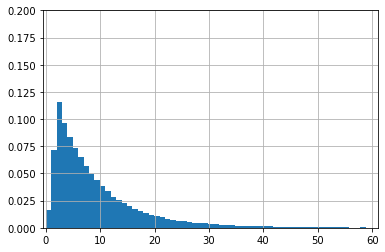

In [7]:
plt.figure()
blunder_300 = db[(db['score'] == 'blunder' )&( db['TimeControl'] == '300+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(blunder_300['delta_time'],ylim=(0,0.2))
plt.savefig('graph.svg')
len(blunder_300)

6676823

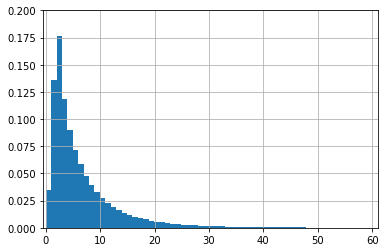

In [8]:
all_300 = db[(db['TimeControl'] == '300+0') & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(all_300['delta_time'],ylim=(0,0.2))
len(all_300)

0 0


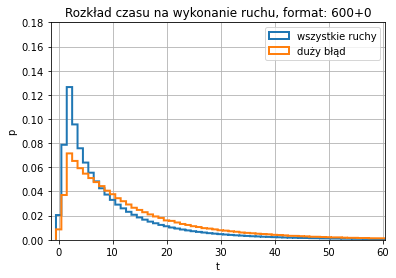

In [72]:
format='600+0'
plt.figure()
blunder= db[(db['score'] == 'blunder' )&( db['TimeControl'] == format) & (db['move'] > 4) & (db['delta_time']>= 0) ]
all = db[(db['TimeControl'] == format) & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(all['delta_time'],ylim=(0,0.18),alpha=1,histtype='step',linewidth=2,label='wszystkie ruchy')
histogram(blunder['delta_time'],ylim=(0,0.18),alpha=1,
          histtype='step',linewidth=2,xlabel='t',ylabel='p',
          title=f'Rozkład czasu na wykonanie ruchu, format: {format}',label='duży błąd')
plt.legend()
plt.savefig('graph.svg')
print(min(all['delta_time']),min(blunder['delta_time']))

0 0


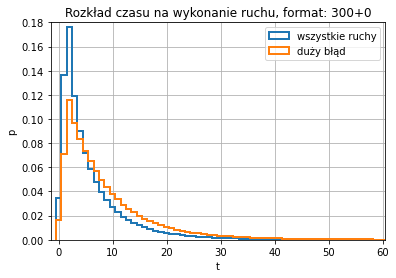

In [73]:
format='300+0'
plt.figure()
blunder= db[(db['score'] == 'blunder' )&( db['TimeControl'] == format) & (db['move'] > 4) & (db['delta_time']>= 0) ]
all = db[(db['TimeControl'] == format) & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(all['delta_time'],ylim=(0,0.18),alpha=1,histtype='step',linewidth=2,label='wszystkie ruchy')
histogram(blunder['delta_time'],ylim=(0,0.18),alpha=1,
          histtype='step',linewidth=2,xlabel='t',ylabel='p',
          title=f'Rozkład czasu na wykonanie ruchu, format: {format}',label='duży błąd')
plt.legend()
plt.savefig('graph.svg')
print(min(all['delta_time']),min(blunder['delta_time']))



prawdopodobienstwo popełenienia błedu w zależności od ruchu dla 300+0

In [3]:
# prawdopodobieństwo popełnienia błędu\nw konkretnym ruchu

format = '600+0'
format2='300+0'
# wszystkie ruchy
m = db[['TimeControl','score','move','Result']].groupby(['TimeControl','move','score']).count()
prob = m/m.groupby(['TimeControl','move']).sum()
prob = prob.reset_index()
prob = prob[prob['score']=='blunder']
prob1 = prob[prob['TimeControl']==format]
prob2 = prob[prob['TimeControl']==format2]

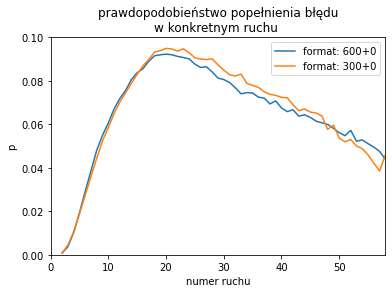

In [12]:
plt.figure()
plt.plot(prob1['move'],prob1['Result'],label=f'format: {format}')

plt.plot(prob2['move'],prob2['Result'],label=f'format: {format2}')

plt.legend()
plt.xlim(0,58)
plt.ylim(0,0.1)
plt.xlabel('numer ruchu')
plt.ylabel(ylabel='p')
plt.title(f'prawdopodobieństwo popełnienia błędu\nw konkretnym ruchu ')
plt.savefig('graph.svg')
plt.show()

0.9977628635346756
0.9880469492903863
0.9638693864139692
0.924564252820138
0.8718472859607475
0.8077651313160732
0.736639241402406
0.6634899837488875
0.5927687557575093
0.5245287524890707
0.4622848615775556
0.4062747966023781
0.35596358115613924
0.3110156699192796
0.2715056148915885
0.2364120015111015
0.20513667961447468
0.17898012202131383
0.15668132759405456
0.13773081291676045
0.12159366942431658
0.10731171350383172
0.0952301693695751
0.0850674494582145
0.07615737293452347
0.06836727914117828
0.06141270378982298
0.055546507347423106
0.050429787624279285
0.9495702123757207
4      0.002237
8      0.009738
12     0.024470
16     0.040778
20     0.057018
24     0.073502
28     0.088053
32     0.099301
36     0.106590
40     0.115121
44     0.118666
48     0.121159
52     0.123835
56     0.126271
60     0.127036
64     0.129256
68     0.132292
72     0.127508
76     0.124588
80     0.120949
84     0.117164
88     0.117456
92     0.112584
96     0.106717
100    0.104741
104    0.102289
10

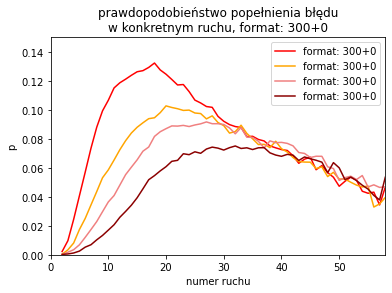

In [11]:
# prawdopodobieństwo popełnienia błędu\nw konkretnym ruchu - różne przedziały
intervals = [
    db[(db['WhiteElo'] <= 1267)&(db['BlackElo'] <= 1267)],
    db[(db['WhiteElo'].between(1268,1500))&(db['BlackElo'].between(1268,1500))],
    db[(db['WhiteElo'].between(1501,1722))&(db['BlackElo'].between(1501,1722))],
    db[(db['WhiteElo'] > 1722)&(db['BlackElo'] > 1722)] ]
colors = ['cornflowerblue','red','blue','orange','darkviolet','lightcoral','midnightblue','darkred']
plt.figure()

i=0
for interval in intervals:
    m = interval[['TimeControl','score','move','Result']].groupby(['TimeControl','move','score']).count()
    prob = m/m.groupby(['TimeControl','move']).sum()
    prob = prob.reset_index()
    prob = prob[prob['score']=='blunder']
    prob1 = prob[prob['TimeControl']==format]
    prob2 = prob[prob['TimeControl']==format2]
    t = 1
    for item in prob2[prob2['move']<31]['Result']:
        t = t*(1-item)
    print(1 - t)

    # plt.plot(prob1['move'],prob1['Result'],label=f'format: {format}',color=colors[i])

    plt.plot(prob2['move'],prob2['Result'],label=f'format: {format2}',color=colors[i+1])
    i+=2

plt.legend()
plt.xlim(0,58)
plt.ylim(0,0.15)
plt.xlabel('numer ruchu')
plt.ylabel(ylabel='p')
plt.title(f'prawdopodobieństwo popełnienia błędu\nw konkretnym ruchu, format: {format2}')
plt.savefig('graph.svg')
plt.show()

prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [15]:
m = db[(db['TimeControl']=='300+0') & (db['delta_time']>=0)& (db['delta_time']<=60)][['score','delta_time','Result']].groupby(['delta_time','score']).count().reset_index()
m

,delta_time,score,Result
0,0,0,480941
1,0,blunder,8109
2,0,dubious move,28744
3,0,mistake,12929
4,1,0,926766
...,...,...,...
239,59,mistake,171
240,60,0,301
241,60,blunder,103
242,60,dubious move,77


In [16]:
m2 = pd.merge(m,m.groupby('delta_time').sum().reset_index(),how='left', on='delta_time')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [17]:
m2[m2['score']=='blunder'][['score','delta_time','prob']]

,score,delta_time,prob
1,blunder,0,0.015279
5,blunder,1,0.030672
9,blunder,2,0.041701
13,blunder,3,0.053850
17,blunder,4,0.063121
...,...,...,...
225,blunder,56,0.153667
229,blunder,57,0.161928
233,blunder,58,0.174079
237,blunder,59,0.152975


<AxesSubplot:xlabel='delta_time'>

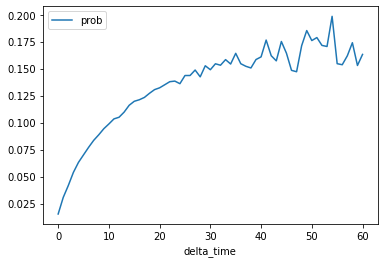

In [18]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='prob')

<AxesSubplot:xlabel='delta_time'>

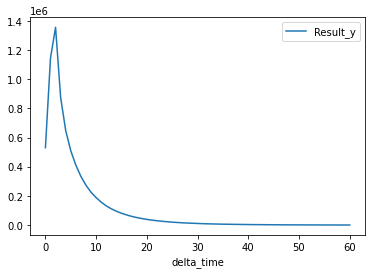

In [19]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='Result_y')

In [20]:
db.groupby('TimeControl').size().reset_index().sort_values(by=0,ascending=False).head(10)

,TimeControl,0
2,600+0,9863104
0,300+0,7645389
1,3600+0,15519


In [12]:
# fitting dist to data try
# blunder_60['delta_time'].var()
def lognorm_params(data):
    ex = data.mean()
    var = data.var()

    mu = np.log(ex**2/np.sqrt(var+ex**2))
    sigma = np.log(var/ex**2 +1)
    return mu, sigma
# def gamma_params(data)

In [22]:
print(lognorm_params(blunder_300['delta_time']))


(1.8371885195101465, 0.7376435535152104)


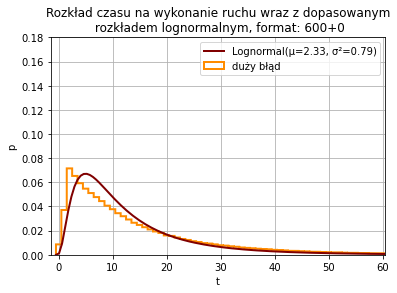

In [42]:
format='600+0'
blunder = db[(db['score'] == 'blunder' )&
             ( db['TimeControl'] == format) &
             (db['move'] > 4) & (db['delta_time']>= 0) ]

y = blunder['delta_time']
x = np.linspace(min(y)+0.0001,max(y),1000)

ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.figure()
plt.plot(x,X, label=f'Lognormal(\u03BC={ex:.2f}, \u03C3\u00B2={var:.2f})',
         color='maroon',linewidth=2)
histogram(blunder['delta_time'],ylim=(0,0.18),alpha=1,color='darkorange',
          histtype='step',linewidth=2,xlabel='t',ylabel='p',
          title=f'Rozkład czasu na wykonanie ruchu wraz z dopasowanym\n rozkładem lognormalnym, format: {format}',
          label='duży błąd')
plt.legend(loc='upper right')
plt.savefig('graph.svg')
plt.show()

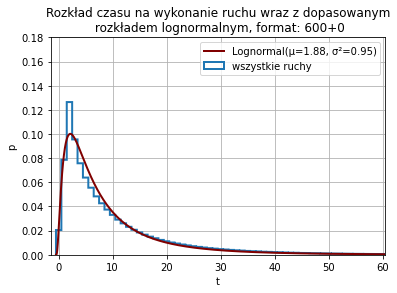

In [44]:
format='600+0'
all = db[( db['TimeControl'] == format) &
         (db['move'] > 4) & (db['delta_time']>= 0) ]

y = all['delta_time']
x = np.linspace(min(y)+0.0001,max(y),10000)

ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.figure()
plt.plot(x,X, label=f'Lognormal(\u03BC={ex:.2f}, \u03C3\u00B2={var:.2f})',
         color='maroon',linewidth=2)
histogram(all['delta_time'],ylim=(0,0.18),alpha=1,
          histtype='step',linewidth=2,xlabel='t',ylabel='p',
          title=f'Rozkład czasu na wykonanie ruchu wraz z dopasowanym\n rozkładem lognormalnym, format: {format}',
          label='wszystkie ruchy')
plt.legend(loc='upper right')
plt.savefig('graph.svg')
plt.show()

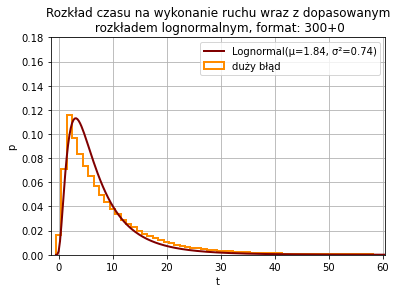

In [43]:
format='300+0'
blunder = db[(db['score'] == 'blunder' )&
             ( db['TimeControl'] == format) &
             (db['move'] > 4) & (db['delta_time']>= 0) ]

y = blunder['delta_time']
x = np.linspace(min(y)+0.0001,max(y),1000)

ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.figure()
plt.plot(x,X, label=f'Lognormal(\u03BC={ex:.2f}, \u03C3\u00B2={var:.2f})',
         color='maroon',linewidth=2)
histogram(blunder['delta_time'],ylim=(0,0.18),alpha=1,color='darkorange',
          histtype='step',linewidth=2,xlabel='t',ylabel='p',
          title=f'Rozkład czasu na wykonanie ruchu wraz z dopasowanym\n rozkładem lognormalnym, format: {format}',label='duży błąd')
plt.legend(loc='upper right')
plt.savefig('graph.svg')
plt.show()

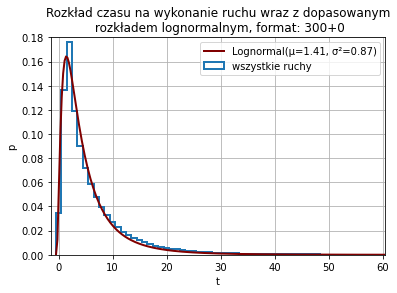

In [41]:
format='300+0'
all = db[( db['TimeControl'] == format) &
         (db['move'] > 4) & (db['delta_time']>= 0) ]

y = all['delta_time']
x = np.linspace(min(y)+0.0001,max(y),10000)

ex,var = lognorm_params(y)

X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

plt.figure()
plt.plot(x,X, label=f'Lognormal(\u03BC={ex:.2f}, \u03C3\u00B2={var:.2f})',
         color='maroon',linewidth=2)
histogram(all['delta_time'],ylim=(0,0.18),alpha=1,
          histtype='step',linewidth=2,xlabel='t',ylabel='p',
          title=f'Rozkład czasu na wykonanie ruchu wraz z dopasowanym\n rozkładem lognormalnym, format: {format}',
          label='wszystkie ruchy')
plt.legend(loc='upper right')
plt.savefig('graph.svg')
plt.show()

In [27]:
# size = len(all_300['delta_time'])
# x = np.linspace(min(all_300['delta_time'])+0.0001,max(all_300['delta_time']),1000)
# y = all_300['delta_time']
#
# dist_names = ['weibull_min']
#
# ###
# ex,var = lognorm_params(y)
# ###
# for dist_name in dist_names:
#     dist = getattr(scipy.stats, dist_name)
#     params = dist.fit(y)
#     arg = params[:-2]
#     loc = params[-2]
#     scale = params[-1]
#     print(params)
#     if arg:
#         pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
#     else:
#         pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
#     plt.plot(x,pdf_fitted, label=dist_name)
# histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo')
# plt.legend(loc='upper right')
# plt.show()
# (blunder_300['delta_time']).mean()

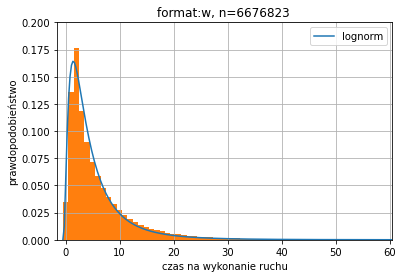

C:\Users\piotr\AppData\Local\Temp/ipykernel_4972/1003854753.py:18: RuntimeWarning: divide by zero encountered in true_divide
  scipy.stats.kstest(y,lambda x: 1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2)))
C:\Users\piotr\AppData\Local\Temp/ipykernel_4972/1003854753.py:18: RuntimeWarning: divide by zero encountered in log
  scipy.stats.kstest(y,lambda x: 1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2)))
C:\Users\piotr\AppData\Local\Temp/ipykernel_4972/1003854753.py:18: RuntimeWarning: invalid value encountered in multiply
  scipy.stats.kstest(y,lambda x: 1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2)))
C:\Users\piotr\AppData\Local\Temp/ipykernel_4972/1003854753.py:18: RuntimeWarning: divide by zero encountered in true_divide
  scipy.stats.kstest(y,lambda x: 1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2)))
C:\Users\piotr\AppData\Local\Temp/ipykernel_4972/1003854753.py:18: RuntimeWarning: divide by zero encountered in log
  scipy.sta

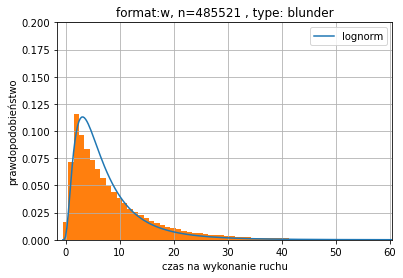

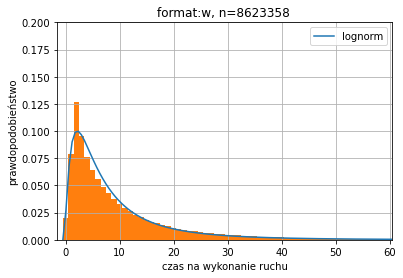

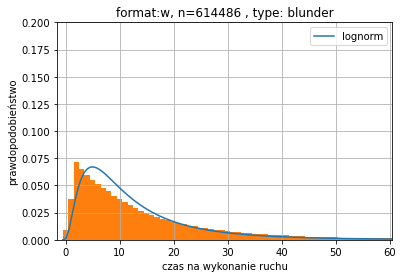

In [78]:
for item in [all_300,blunder_300,all_600,blunder_600]:

    y = item['delta_time']

    size = len(y)
    x = np.linspace(min(y)+0.0001,max(y),1000)


    ex,var = lognorm_params(y)

    X=1/(x*var*np.sqrt(2*pi))*np.exp(-(np.log(x)-ex)**2/(2*var**2))

    plt.plot(x,X, label='lognorm')
    histogram(y,ylim=(0,0.2),xlabel='czas na wykonanie ruchu', ylabel='prawdopodobieństwo',title=f'format:{item.iloc[0,6]}, n={size} {", type: blunder" if item.iloc[0,1]=="blunder" else ""}')
    plt.legend(loc='upper right')
    plt.show()

In [80]:
scipy.stats.ks_1samp(x,)

<bound method rv_continuous.cdf of <scipy.stats._continuous_distns.norm_gen object at 0x000002050EBB9C70>>

porównanie
zależność:
x -  numer ruchu, y średni czas na wykonanie - dla wszystkich ruchów i tylko dla ruchów blunder

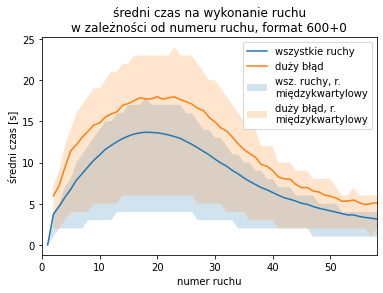

In [29]:
format = '600+0'
a = db.groupby(['TimeControl','move']).agg({'delta_time': np.mean}).reset_index()

p1 = a[a['TimeControl'] == format][['move','delta_time']]
b = db.groupby(['TimeControl','score','move']).agg({'delta_time': np.mean}).reset_index()
p2 = b[(b['TimeControl'] == format) & (b['score'] == 'blunder')][['move','delta_time']]

plt.figure(1)
plt.plot(p1['move'],p1['delta_time'],label='wszystkie ruchy')

plt.fill_between(db[db['TimeControl']==format][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.25).reset_index()['move'],
                 db[db['TimeControl']==format][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.25).reset_index()['delta_time'],
                 db[db['TimeControl']==format][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.75).reset_index()['delta_time'],
                 alpha=0.2,label="wsz. ruchy, r.\nmiędzykwartylowy")

plt.plot(p2['move'],p2['delta_time'],label='duży błąd')
plt.fill_between(db[(db['TimeControl']==format) & (db['score']=='blunder')][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.25).reset_index()['move'],
                 db[(db['TimeControl']==format) & (db['score']=='blunder')][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.25).reset_index()['delta_time'],
                 db[(db['TimeControl']==format) & (db['score']=='blunder')][['TimeControl','move','delta_time']].groupby(['TimeControl','move']).quantile(0.75).reset_index()['delta_time'],
                 alpha=0.2,label="duży błąd, r.\nmiędzykwartylowy")
plt.legend()
plt.xlim(0,58)
plt.xlabel('numer ruchu')
plt.ylabel("średni czas [s]")
plt.title(f'średni czas na wykonanie ruchu\nw zależności od numeru ruchu, format {format}')
plt.savefig('graph.svg')
plt.show()

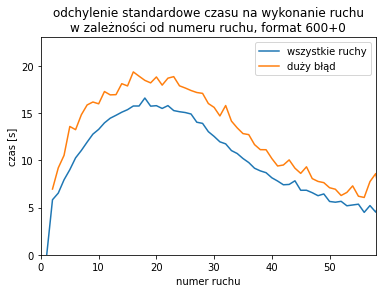

In [30]:
format = '600+0'
a = db.groupby(['TimeControl','move']).agg({'delta_time': np.std}).reset_index()
p1 = a[a['TimeControl'] == format][['move','delta_time']]

b = db.groupby(['TimeControl','score','move']).agg({'delta_time': np.std}).reset_index()
p2 = b[(b['TimeControl'] == format) & (b['score'] == 'blunder')][['move','delta_time']]

plt.figure()
plt.plot(p1['move'],p1['delta_time'],label='wszystkie ruchy')

plt.plot(p2['move'],p2['delta_time'],label='duży błąd')

plt.legend()
plt.xlim(0,58)
plt.ylim(0,23)
plt.xlabel('numer ruchu')
plt.ylabel(ylabel='czas [s]')
plt.title(f'odchylenie standardowe czasu na wykonanie ruchu\nw zależności od numeru ruchu, format {format}')
plt.savefig('graph.svg')
plt.show()

jak wyżej + rozbicie na ranking graczy

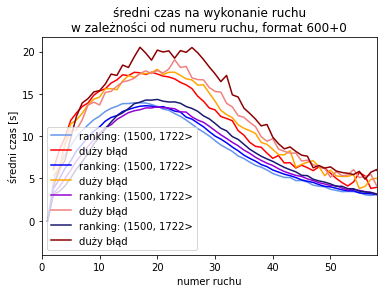

In [31]:
format = '600+0'
intervals = [
    db[(db['WhiteElo'] <= 1267)&(db['BlackElo'] <= 1267)],
    db[(db['WhiteElo'].between(1268,1500))&(db['BlackElo'].between(1268,1500))],
    db[(db['WhiteElo'].between(1501,1722))&(db['BlackElo'].between(1501,1722))],
    db[(db['WhiteElo'] > 1722)&(db['BlackElo'] > 1722)]
]

colors = ['cornflowerblue','red','blue','orange','darkviolet','lightcoral','midnightblue','darkred']
i=0
for interval in intervals:

    a = interval.groupby(['TimeControl','move']).agg({'delta_time': np.mean}).reset_index()

    p1 = a[a['TimeControl'] == format][['move','delta_time']]
    b = interval.groupby(['TimeControl','score','move']).agg({'delta_time': np.mean}).reset_index()
    p2 = b[(b['TimeControl'] == format) & (b['score'] == 'blunder')][['move','delta_time']]

    plt.figure(1)
    plt.plot(p1['move'],p1['delta_time'],label='ranking: (1500, 1722>',color=colors[i])

    plt.plot(p2['move'],p2['delta_time'],label='duży błąd',color=colors[i+1])
    i+=2
plt.legend()
plt.xlim(0,58)
plt.xlabel('numer ruchu')
plt.ylabel("średni czas [s]")
plt.title(f'średni czas na wykonanie ruchu\nw zależności od numeru ruchu, format {format}')
plt.savefig('graph.svg')
plt.show()

tyle ruchów na gre jest

In [32]:
# ruchy kwantyl rzędu .95
db[['game_ID','move']].groupby('game_ID').max().quantile(.95)

move    58.0
Name: 0.95, dtype: float64

In [33]:
# r2/r2.sum()
# plt.figure()
# plt.plot(np.arange(1,121),r2/r2.sum())
#
# plt.plot([58,58],[0,0.01], color='red')
#
# plt.text(52, 0.013,'kwantyl 0.95\nruch 58',color='red')
#
#
#
# plt.xlabel('liczba zagranych ruchów w grze')
# plt.ylabel('p')
# plt.title('rozkład długości gry (liczba zagranych ruchów)')
# plt.savefig('graph.svg')
# plt.show()

NameError: name 'r2' is not defined

In [ ]:
np.arange(1,120)

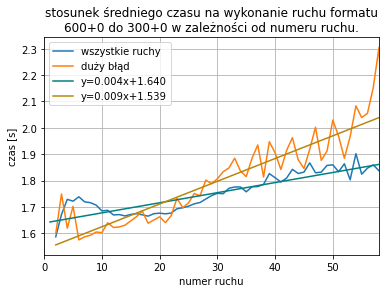

In [48]:
# stosunek sredniej 300+0 do 600+0

format = '600+0'
format2 = '300+0'
a = db.groupby(['TimeControl','move']).agg({'delta_time': np.mean}).reset_index()

p1 = a[(a['TimeControl'] == format) & (a['move'] < 60)][['move','delta_time']]
p11 = a[(a['TimeControl'] == format2) & (a['move'] < 60)][['move','delta_time']]

b = db.groupby(['TimeControl','score','move']).agg({'delta_time': np.mean}).reset_index()
p2 = b[(b['TimeControl'] == format) & (b['score'] == 'blunder')& (b['move'] < 60)][['move','delta_time']]

p22 = b[(b['TimeControl'] == format2) & (b['score'] == 'blunder')& (b['move'] < 60)][['move','delta_time']]
plt.figure()
st1 = p1.reset_index()['delta_time']/p11.reset_index()['delta_time']
st2 = p2.reset_index()['delta_time']/p22.reset_index()['delta_time']
plt.plot(p1['move'],st1,label='wszystkie ruchy')
plt.plot(p2['move'],st2,label='duży błąd')
R1 = np.polyfit(p1.reset_index().iloc[1:,1],st1.iloc[1:],1)
R2 = np.polyfit(p2.reset_index().iloc[1:,1],st2.iloc[1:],1)
plt.plot(p1['move'],p1['move']*R1[0]+R1[1],label=f'y={R1[0]:.3f}x+{R1[1]:.3f}',color='teal')
plt.plot(p2['move'],p2['move']*R2[0]+R2[1],label=f'y={R2[0]:.3f}x+{R2[1]:.3f}',color='darkgoldenrod')

plt.grid(True)
plt.legend()
plt.xlim(0,58)
# plt.ylim(0,23)
plt.xlabel('numer ruchu')
plt.ylabel(ylabel='czas [s]')
plt.title(f'stosunek średniego czasu na wykonanie ruchu formatu\n600+0 do 300+0 w zależności od numeru ruchu.')
plt.savefig('graph.svg')
plt.show()


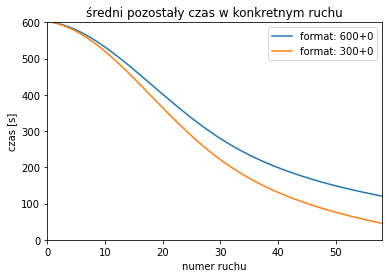

In [47]:
format = '600+0'
format2 = '300+0'
a = db.groupby(['TimeControl','move']).agg({'delta_time': np.mean}).reset_index()

p1 = a[(a['TimeControl'] == format) & (a['move'] < 60)][['move','delta_time']]
p11 = a[(a['TimeControl'] == format2) & (a['move'] < 60)][['move','delta_time']]

plt.figure()
plt.plot(p1['move'],600-np.cumsum(p1['delta_time']),label=f'format: {format}')
plt.plot(p11['move'],600-2*np.cumsum(p11['delta_time']),label=f'format: {format2}')
# plt.plot(p2['move'],np.cumsum(p2['delta_time']),label='duży błąd')

plt.legend()
plt.xlim(0,58)
plt.ylim(0,600)
plt.xlabel('numer ruchu')
plt.ylabel(ylabel='czas [s]')
plt.title(f'średni pozostały czas w konkretnym ruchu')
plt.savefig('graph.svg')
plt.show()
